In [1]:
import strawberryfields as sf
from strawberryfields.ops import *
import mentpy as mp
import numpy as np

Generate a circuit given a constraint:

(<Figure size 500x500 with 1 Axes>, <Axes: >)

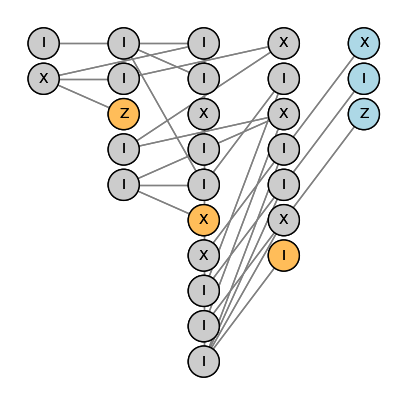

In [3]:
from algo import generate_circuit

# contraint: implement 3 rotations around XIZ, IZX, YXX
op = mp.PauliOp('XIZ;IZX;YXX')
circuit = generate_circuit(op)
# circuit = mp.templates.muta(2,1)

rot = mp.utils.calculate_complete_gens(circuit)
mp.draw(circuit, figsize=(5, 5), pauliop=rot[0])
# mp.draw(circuit, figsize=(5, 5))

In [5]:
circuit = mp.templates.linear_cluster(5)

In [6]:
p_circuit = sf.Program(2*len(circuit))

In [52]:
def apply_hadamard(qubit_modes):
    # Apply a 50/50 beamsplitter
    BSgate(np.pi/4, 0) | (qubit_modes[0], qubit_modes[1])

def apply_cz(qubit_modes_1, qubit_modes_2):
    # do KLM protocol
    pass

'Y'

In [23]:
with p_circuit.context as q:
    # do dual-rail Hadamard gate
    for node in range(len(circuit)):
        BSgate(np.pi/4, 0) | (q[2*node], q[2*node+1])
    
    # do CZ gates for each edge
    for edge in circuit.edges:
        CZgate(np.pi) | (q[2*edge[0]], q[2*edge[1]])
    
    # measure operators
    for layer in circuit.flow.layers:
        for node in layer:
            op = circuit[node]
            if op is not None:
                plane = op.plane
                if plane == 'XY':
                    # measure in the cos(op.angle)X + sin(op.angle)Y basis
                    # can be done by rotating the state with a MZ interferometer and measuring in the X basis
                    Rgate(op.angle) | q[2*node]
                    Rgate(op.angle) | q[2*node+1]
                    BSgate(np.pi/4, 0) | (q[2*node], q[2*node+1])
                    MeasureX | q[2*node]
                    MeasureX | q[2*node+1]
                elif plane == 'XZ':
                    # measure in the cos(op.angle)X + sin(op.angle)Z basis
                    # can be done by rotating the state with a MZ interferometer and measuring in the X basis
                    Rgate(op.angle) | q[2*node]
                    Rgate(op.angle) | q[2*node+1]
                    BSgate(np.pi/4, 0) | (q[2*node], q[2*node+1])
                    MeasureX | q[2*node]
                    MeasureX | q[2*node+1]
                

In [25]:
p_circuit.draw_circuit()

['/Users/luismantilla/Desktop/UofT/2024-1/Projects/PhotonicEng/photonics-designer/graph_gen/deterministic/circuit_tex/output_2024_April_24_04:43PM.tex',
 '\\documentclass{article}\n\\pagestyle{empty}\n\\usepackage{qcircuit}\n\\begin{document}\n\\Qcircuit {\n & \\multigate{1}{BS}  & \\qw  & \\qw  & \\qw \\\\\n & \\ghost{BS}  & \\multigate{1}{BS}  & \\qw  & \\qw \\\\\n & \\qw  & \\ghost{BS}  & \\multigate{1}{BS}  & \\qw \\\\\n & \\qw  & \\qw  & \\ghost{BS}  & \\qw \\\\\n & \\qw  & \\qw  & \\qw  & \\qw \\\\\n & \\qw  & \\qw  & \\qw  & \\qw \\\\\n & \\qw  & \\qw  & \\qw  & \\qw \\\\\n & \\qw  & \\qw  & \\qw  & \\qw \\\\\n}\n\\end{document}']

In [24]:
eng = sf.Engine(backend="gaussian")


In [7]:
results = eng.run(gate_teleportation)
_, cov = results.state.reduced_gaussian([2])
print("Covariance matrix:\n", cov)

Covariance matrix:
 [[ 1.11257261 -0.5851662 ]
 [-0.5851662   1.20659044]]


In [8]:
m0, m1 = results.samples[0]
print(m0, m1)

3.26784206080346 -9.414841683054753
